In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_line(runtimes, frameworks, path):

    all_data = []

    for runtime in runtimes:
        try:
            file_name = f'{path}/test_scores_wide_{runtime}.csv'

            df = pd.read_csv(file_name, sep=';')

            df['Runtime'] = runtime

            all_data.append(df)
        except FileNotFoundError:
            print(f"File {file_name} not found. Skipping this runtime.")
        
    all_data_df = pd.concat(all_data, ignore_index=True)

    average_auc = all_data_df.groupby('Runtime')[frameworks].mean().reset_index()

    # hard coded interpolated value, until the results are available
    average_auc.AutoPrognosis.iloc[3] = 0.853068
        
    plt.figure(figsize=(10, 6))

    for framework in frameworks:
        if framework in average_auc.columns:
            plt.plot(average_auc['Runtime'], average_auc[framework], marker='o', label=framework)

    plt.xlabel('Runtime (seconds)')
    plt.ylabel('Average AUC')
    plt.title('Average AUC Scores of Different Frameworks Under Various Runtimes')
    plt.legend()
    plt.grid(True)

    plt.show()

C:\Users\3aboo\AppData\Local\Temp\ipykernel_20532\1717532503.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_auc.AutoPrognosis.iloc[3] = 0.853068


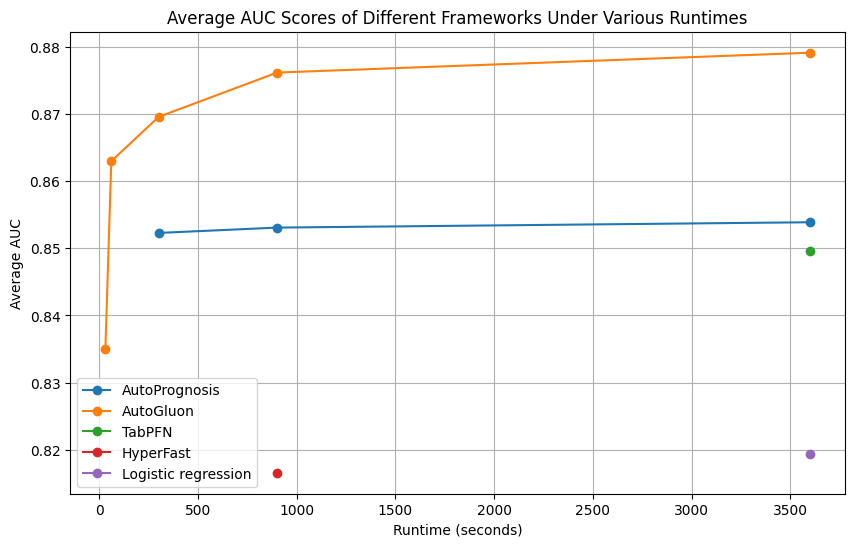

In [2]:
runtimes = [30, 60, 300, 900, 3600]
frameworks = ['AutoPrognosis', 'AutoGluon', 'TabPFN', 'HyperFast', 'Logistic regression']
plot_line(runtimes, frameworks, "results")